# Python for Data Analysis II




**Agenda:**

    * matplotlib
    * seaborn
    * numpy
    * scipy

# Basic plotting

In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
oo = pd.read_csv('olympics.csv', skiprows=4)

In [6]:
fo = oo[oo.Edition == 1896]
fo.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


### Line plot

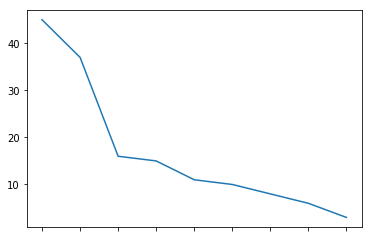

In [7]:
fo.Sport.value_counts().plot(kind='line');

### Bar plot

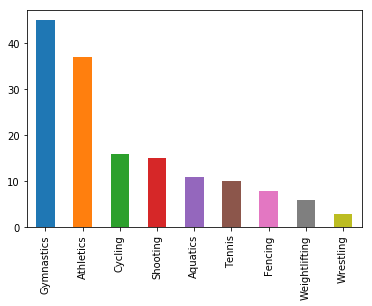

In [8]:
fo.Sport.value_counts().plot(kind='bar');

### Horizontal bar plot

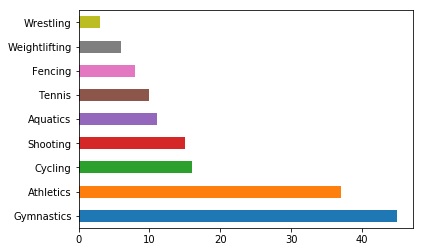

In [9]:
fo.Sport.value_counts().plot(kind='barh');

### Pie chart

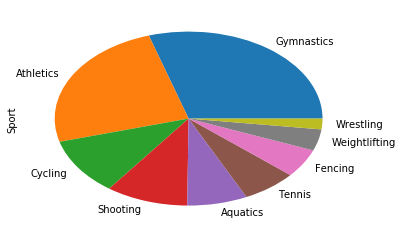

In [10]:
fo.Sport.value_counts().plot(kind='pie');

## figsize()

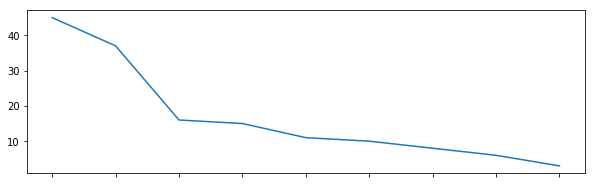

In [11]:
fo.Sport.value_counts().plot(figsize=(10,3));

# Seaborn basic plotting

# Numpy

Install numpy https://www.scipy.org/install.html

In [13]:
import numpy as np

In [15]:
np.__version__

'1.14.2'

## Arrays

The central feature of NumPy is the array object class. Arrays are similar to lists in Python,
except that every element of an array must be of the same type, typically a numeric type like
float or int. Arrays make operations with large amounts of numeric data very fast and are
generally much more efficient than lists.

In [17]:
a = np.array([1, 4, 5, 8], float)

In [18]:
type(a)

numpy.ndarray

In [20]:
a

array([1., 4., 5., 8.])

Here, the function array takes two arguments: the list to be converted into the array and the
type of each member of the list. Array elements are accessed, sliced, and manipulated just like
lists:

In [21]:
a[:2]

array([1., 4.])

In [22]:
a[3]

8.0

In [23]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)

In [24]:
a

array([[1., 2., 3.],
       [4., 5., 6.]])

In [25]:
a[0,0]

1.0

In [26]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)
a[1,:]

array([4., 5., 6.])

In [27]:
a[:,2]

array([3., 6.])

In [28]:
a.shape

(2, 3)

In [29]:
a = np.array(range(6), float).reshape((2, 3))

In [30]:
a

array([[0., 1., 2.],
       [3., 4., 5.]])

In [31]:
a.transpose()

array([[0., 3.],
       [1., 4.],
       [2., 5.]])

In [32]:
a = np.array([1,2], float)
b = np.array([3,4,5,6], float)
c = np.array([7,8,9], float)
np.concatenate((a, b, c))

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

## Other ways to create arrays

In [34]:
np.arange(5, dtype=float)

array([0., 1., 2., 3., 4.])

In [35]:
np.ones((2,3), dtype=float)

array([[1., 1., 1.],
       [1., 1., 1.]])

In [36]:
np.zeros(7, dtype=int)

array([0, 0, 0, 0, 0, 0, 0])

## Array mathematics

In [37]:
a = np.array([1,2,3], float)
b = np.array([5,2,6], float)
a + b

array([6., 4., 9.])

In [39]:
a - b

array([-4.,  0., -3.])

In [40]:
a * b

array([ 5.,  4., 18.])

In [41]:
b / a

array([5., 1., 2.])

In [42]:
a % b

array([1., 0., 3.])

In [43]:
b**a

array([  5.,   4., 216.])

In [44]:
a = np.array([1,2,3], float)
b = np.array([4,5], float)
a + b

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In addition to the standard operators, NumPy offers a large library of common mathematical
functions that can be applied elementwise to arrays. Among these are the functions: abs,
sign, sqrt, log, log10, exp, sin, cos, tan, arcsin, arccos,
arctan, sinh, cosh, tanh, arcsinh, arccosh, and arctanh

## Basic array operations

In [45]:
a = np.array([2, 4, 3], float)
a.sum()

9.0

In [46]:
a.mean()

3.0

In [47]:
a.std()

0.816496580927726

In [49]:
a.min()

2.0

In [50]:
a.max()

4.0

In [51]:
a.var()

0.6666666666666666

## Array item selection and manipulation

In [52]:
a = np.array([[6, 4], [5, 9]], float)

In [53]:
a[a >= 6]

array([6., 9.])

In [54]:
a = np.array([2, 4, 6, 8], float)
b = np.array([0, 0, 1, 3, 2, 1], int)
a.take(b)

array([2., 2., 4., 8., 6., 4.])

More: http://docs.scipy.org/doc/